In [88]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import seaborn as sns 

In [89]:
df = pd.read_csv('/kaggle/input/steam-video-games/steam-200k.csv')
df.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


### Exploratory Data Analysis

In [90]:
df.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [91]:
df.drop(columns =['0'],inplace =True)

In [92]:
cols = {'151603712':'game_id','The Elder Scrolls V Skyrim':'game_name','purchase':'status','1.0':'Hourplayed'}
df.rename(columns = cols,inplace =True)

In [93]:
df.head()

,game_id,game_name,status,Hourplayed
0,151603712,The Elder Scrolls V Skyrim,play,273.0
1,151603712,Fallout 4,purchase,1.0
2,151603712,Fallout 4,play,87.0
3,151603712,Spore,purchase,1.0
4,151603712,Spore,play,14.9


In [94]:
df.isnull().sum()

game_id       0
game_name     0
status        0
Hourplayed    0
dtype: int64

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   game_id     199999 non-null  int64  
 1   game_name   199999 non-null  object 
 2   status      199999 non-null  object 
 3   Hourplayed  199999 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ MB


In [96]:
df.dtypes

game_id         int64
game_name      object
status         object
Hourplayed    float64
dtype: object

In [97]:
df.shape

(199999, 4)

In [98]:
df.duplicated().sum()

707

In [99]:
# droping a duplicated values:
df.drop_duplicates(inplace=True)

In [100]:
# let's check unique values
columns=df.columns
for col in columns:
    print(col,':\n',df[col].unique())
    print(df[col].value_counts())
    print('\n',20*'**','\n')

game_id :
 [151603712 187131847  59945701 ... 176449171 221315846 128470551]
62990992     1566
33865373      942
11403772      902
30246419      894
47457723      852
             ... 
89988424        1
283979950       1
293551083       1
209746499       1
198709823       1
Name: game_id, Length: 12393, dtype: int64

 **************************************** 

game_name :
 ['The Elder Scrolls V Skyrim' 'Fallout 4' 'Spore' ... 'Space Colony'
 'Life is Hard' 'Executive Assault']
Dota 2                             9682
Team Fortress 2                    4646
Counter-Strike Global Offensive    2789
Unturned                           2632
Left 4 Dead 2                      1752
                                   ... 
Putt-Putt Joins the Parade            1
Ducati World Championship             1
Chunk of Change Knight                1
STASIS                                1
Soccertron                            1
Name: game_name, Length: 5155, dtype: int64

 ********************************

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199292 entries, 0 to 199998
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   game_id     199292 non-null  int64  
 1   game_name   199292 non-null  object 
 2   status      199292 non-null  object 
 3   Hourplayed  199292 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.6+ MB


/tmp/ipykernel_28/2507638799.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


array([[<Axes: title={'center': 'game_id'}>,
        <Axes: title={'center': 'Hourplayed'}>]], dtype=object)

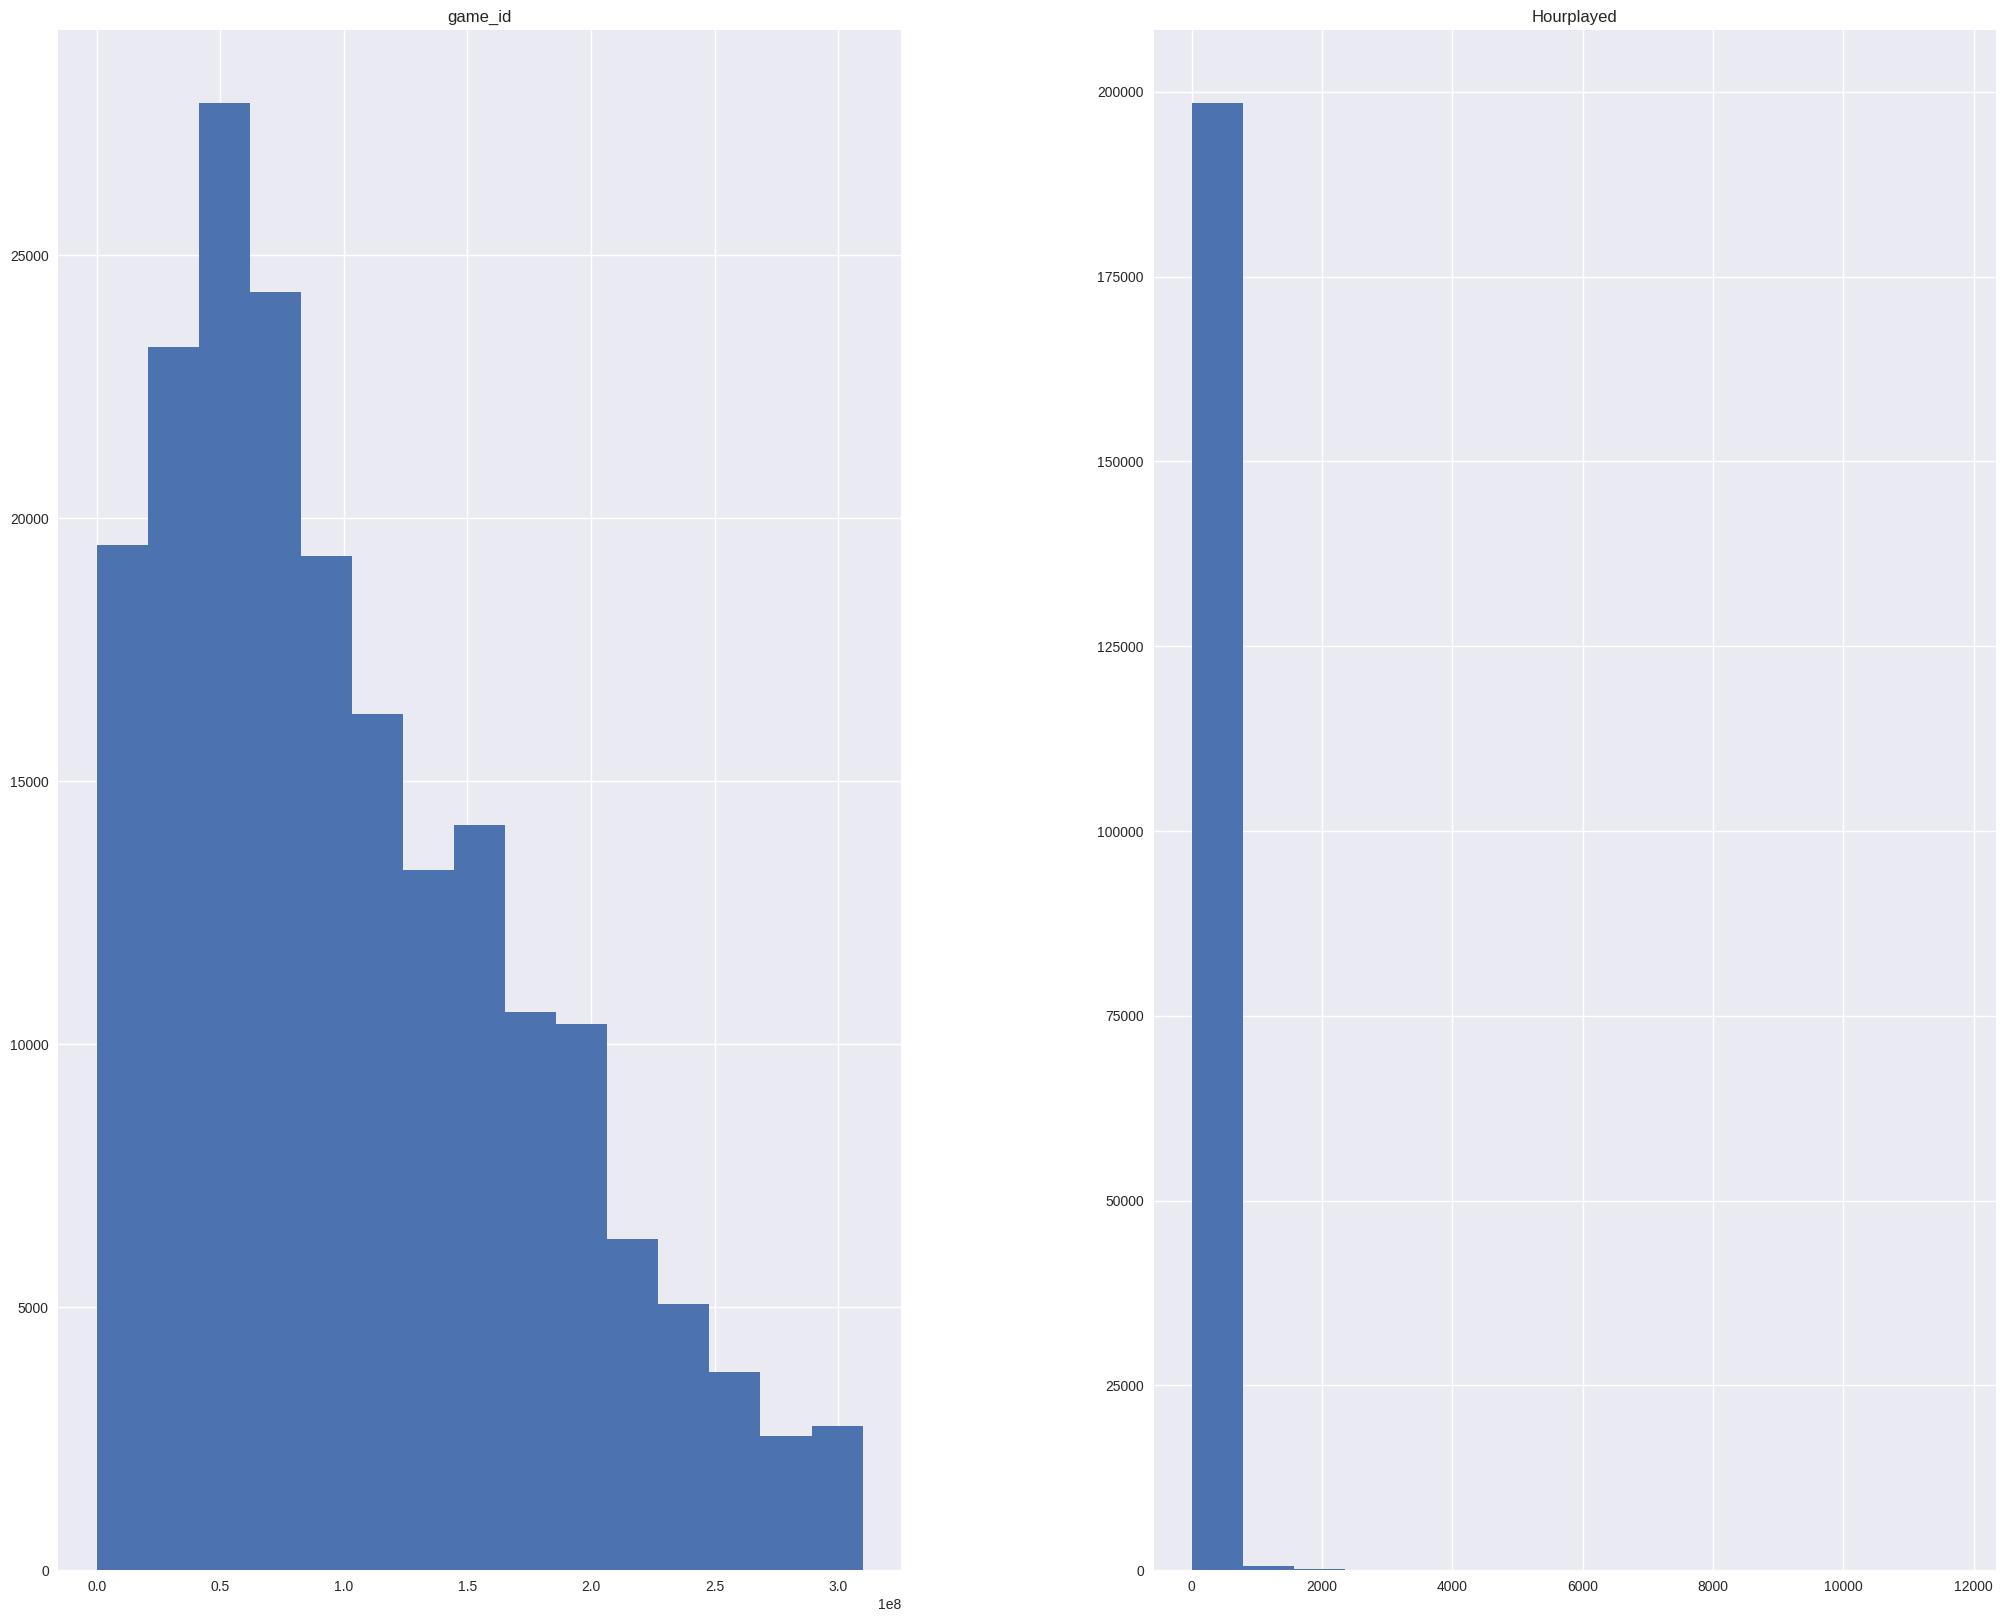

In [102]:
plt.style.use("seaborn")
df.hist(figsize=(25,20), bins=15)

In [103]:
df.describe().astype(int)

,game_id,Hourplayed
count,199292,199292
mean,103717860,17
std,72120577,138
min,5250,0
25%,47384303,1
50%,86912006,1
75%,154230933,1
max,309903146,11754


In [58]:
df['status'].unique()

array(['play', 'purchase'], dtype=object)

In [104]:
df['status'].value_counts()

purchase    128803
play         70489
Name: status, dtype: int64

<Axes: xlabel='status', ylabel='count'>

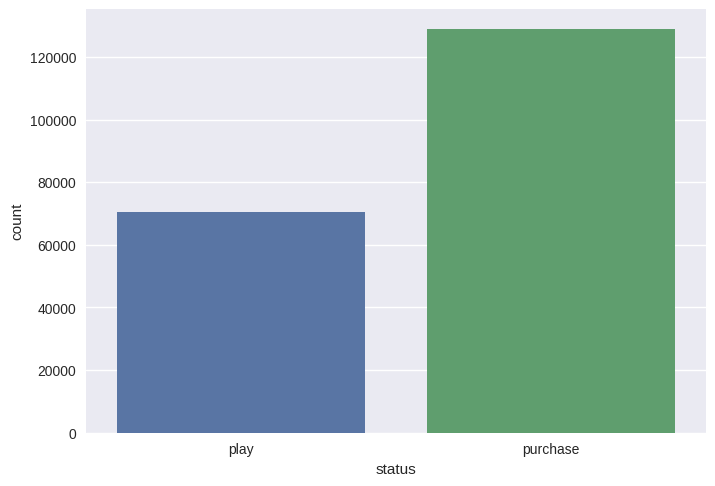

In [105]:
sns.countplot(x="status", data=df)

<Axes: ylabel='status'>

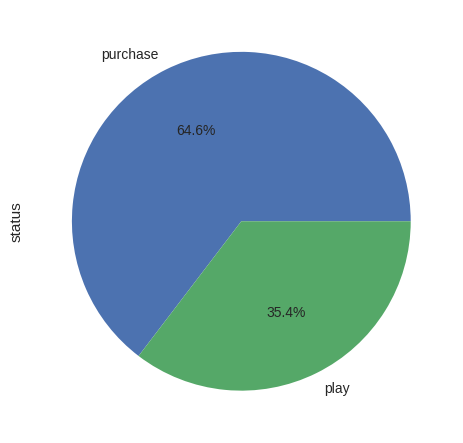

In [106]:
df['status'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: >

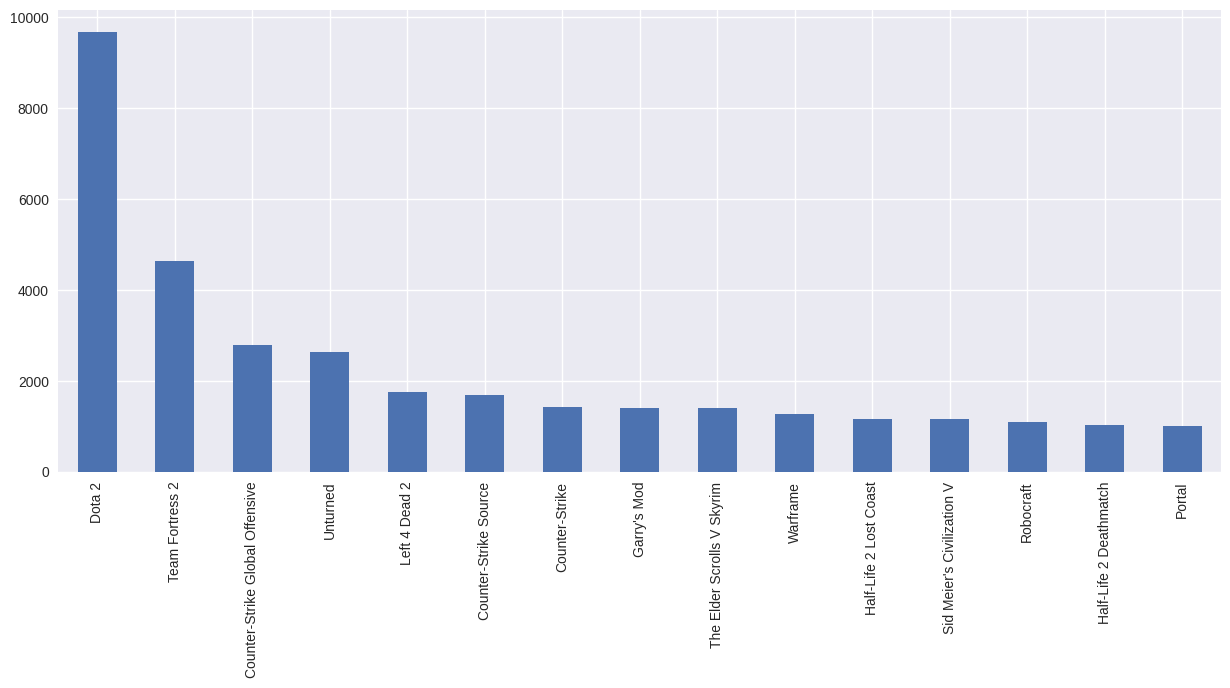

In [107]:
# plotting for top 15 games:
df['game_name'].value_counts().head(15).plot(kind = 'bar',figsize =(15,6))

<Axes: ylabel='game_name'>

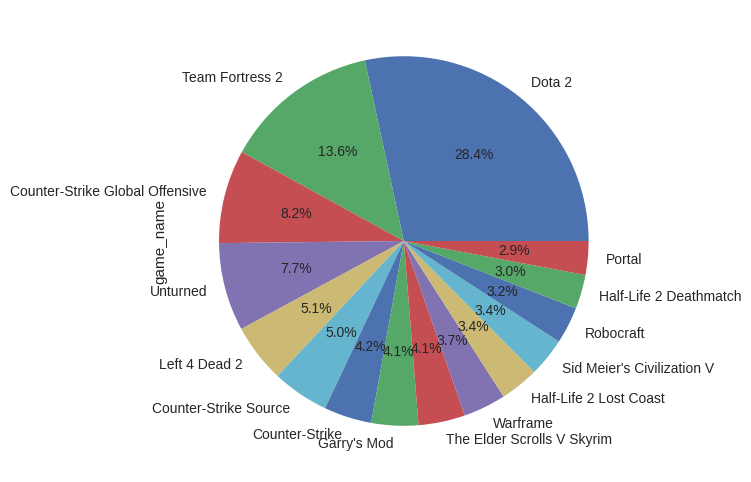

In [108]:
df['game_name'].value_counts().head(15).plot(kind = 'pie',figsize =(15,6), autopct = '%1.1f%%')

### Convert Hours To Rating

In [109]:
df= df[(df['Hourplayed']>=2) & (df['status']=='play')]

In [110]:
df = df[df.groupby('game_name').game_id.transform(len)>=20]

In [66]:
df['game_name'].nunique()

431

In [111]:
df['game_id'] = df['game_id'].astype(str)

In [112]:
average = df.groupby(['game_name'],as_index = False).Hourplayed.mean()

In [113]:
average['avg_hourplayed'] = average['Hourplayed']
average.drop(columns ='Hourplayed',inplace = True )

In [114]:
average.head()

,game_name,avg_hourplayed
0,7 Days to Die,50.777500
1,APB Reloaded,113.377778
2,ARK Survival Evolved,105.982812
3,Ace of Spades,10.971739
4,AdVenture Capitalist,67.760674


In [119]:
df = df.merge(average,on = 'game_name')

In [120]:
condition = [
    df['Hourplayed']>= (0.8*df['avg_hourplayed']),
   (df['Hourplayed']>=0.6*df['avg_hourplayed'])&(df['Hourplayed']<0.8*df['avg_hourplayed']),
   (df['Hourplayed']>=0.4*df['avg_hourplayed'])&(df['Hourplayed']<0.6*df['avg_hourplayed']),
   (df['Hourplayed']>=0.2*df['avg_hourplayed'])&(df['Hourplayed']<0.4*df['avg_hourplayed']),
    df['Hourplayed']>=0
    
]
values = [5,4,3,2,1]
df['rating'] = np.select(condition,values)

In [121]:
df.head()

,game_id,game_name,status,Hourplayed,avg_hourplayed_x,avg_hourplayed_y,avg_hourplayed,rating
0,151603712,The Elder Scrolls V Skyrim,play,273.0,115.351792,115.351792,115.351792,5
1,59945701,The Elder Scrolls V Skyrim,play,58.0,115.351792,115.351792,115.351792,3
2,92107940,The Elder Scrolls V Skyrim,play,110.0,115.351792,115.351792,115.351792,5
3,250006052,The Elder Scrolls V Skyrim,play,465.0,115.351792,115.351792,115.351792,5
4,11373749,The Elder Scrolls V Skyrim,play,220.0,115.351792,115.351792,115.351792,5


In [122]:
df.drop(columns = [ 'status', 'Hourplayed', 'avg_hourplayed'],inplace =True )

### Memory Based Collaborative Filtering

In [123]:
from sklearn.metrics.pairwise import pairwise_distances,cosine_similarity
from scipy.spatial.distance import cosine,correlation

In [124]:
pv = df.pivot_table(index=['game_id'],columns=['game_name'],values = 'rating')


In [125]:
pv = pv.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)),axis=1)

In [126]:
pv = pv.fillna(0)
pv = pv.T
pv = pv.loc[:,(pv != 0).any(axis=0)]

In [127]:
pv.head()

game_id,100057229,100096071,100311267,100322840,100351493,100359523,100431715,100444456,100519466,100630947,...,994489,9946133,99484728,99640715,99704390,99711581,99713453,99723205,99766416,99802512
game_name,,,,,,,,,,,,,,,,,,,,,
7 Days to Die,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
APB Reloaded,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,-0.475,-0.166667,0.0,0.0,0.0,0.0
ARK Survival Evolved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.43,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
Ace of Spades,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
AdVenture Capitalist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0


In [128]:
import scipy as sp
import operator

In [129]:
# converting data into sparse matrix format 
pv_sparse = sp.sparse.csr_matrix(pv.values)

In [130]:
item_simi = cosine_similarity(pv_sparse)
user_simi = cosine_similarity(pv_sparse.T)

In [131]:
## inserting similarity matrix into a dataframe object
# item similarity dataframe:
df_item = pd.DataFrame(item_simi,index = pv.index ,columns = pv.index)
# User_similarity dataframe
df_user = pd.DataFrame(user_simi , index= pv.columns,columns=pv.columns)

In [132]:
df_item.head()

game_name,7 Days to Die,APB Reloaded,ARK Survival Evolved,Ace of Spades,AdVenture Capitalist,Aftermath,Age of Chivalry,Age of Empires II HD Edition,Age of Empires III Complete Collection,Age of Mythology Extended Edition,...,"Warhammer 40,000 Dawn of War II - Chaos Rising","Warhammer 40,000 Space Marine",Wasteland 2,Watch_Dogs,Wolfenstein The New Order,Worms Reloaded,Worms Revolution,XCOM Enemy Unknown,Zombie Panic Source,theHunter
game_name,,,,,,,,,,,,,,,,,,,,,
7 Days to Die,1.000000,0.011889,0.023910,0.003702,-0.006406,-0.036463,0.047295,0.049644,-0.003137,0.000000,...,-0.038894,0.017805,-0.027081,0.011157,0.028949,0.049210,-0.028614,0.063191,0.061200,-0.034545
APB Reloaded,0.011889,1.000000,-0.046199,-0.012738,-0.030157,-0.005157,-0.000540,-0.013881,-0.008468,0.004806,...,0.000280,0.027197,0.000000,0.000000,0.010149,-0.038028,-0.007166,-0.008280,0.024256,-0.051036
ARK Survival Evolved,0.023910,-0.046199,1.000000,-0.006097,-0.006445,0.000000,0.023592,0.008420,-0.020514,-0.009609,...,-0.031033,0.000214,-0.014996,0.022721,0.000000,-0.023283,0.000231,0.001994,0.028022,-0.015766
Ace of Spades,0.003702,-0.012738,-0.006097,1.000000,-0.003154,0.000000,-0.034444,-0.006776,0.000000,0.000000,...,0.000858,-0.022283,0.000000,0.000000,0.000000,0.050384,0.053498,0.009763,-0.022023,-0.029286
AdVenture Capitalist,-0.006406,-0.030157,-0.006445,-0.003154,1.000000,-0.043081,0.035806,-0.029016,-0.002733,0.000000,...,0.019090,0.008819,0.000000,0.000000,-0.003790,0.000000,0.014821,-0.014461,0.000000,0.086266


In [133]:
df_user.head()

game_id,100057229,100096071,100311267,100322840,100351493,100359523,100431715,100444456,100519466,100630947,...,994489,9946133,99484728,99640715,99704390,99711581,99713453,99723205,99766416,99802512
game_id,,,,,,,,,,,,,,,,,,,,,
100057229,1.000000,-0.102897,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.112023,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,-0.074536,0.000000,0.052849,0.000000,0.0
100096071,-0.102897,1.000000,0.049862,0.0,0.000000,0.0,0.067894,0.000000,-0.154673,-0.186033,...,0.303790,0.036035,0.000000,0.0,-0.150648,-0.046017,0.000000,0.013983,0.039199,0.0
100311267,0.000000,0.049862,1.000000,0.0,-0.004669,0.0,0.000000,-0.030655,0.178706,0.000000,...,-0.054711,0.280644,0.032827,0.0,-0.035141,0.645942,0.000000,-0.128874,0.000000,0.0
100322840,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.259037,0.000000,0.204124,0.000000,0.000000,0.0
100351493,0.000000,0.000000,-0.004669,0.0,1.000000,0.0,0.172433,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [134]:
# Write a function which will gives the top 5 games having highest cosine similarity 
def top_games(game):
    count = 1
    print('similar game to {} include \n'.format(game))
    for item in df_item .sort_values(ascending=False,by = game).index[1:6]:
        print('NO.{} = {}'.format(count,item))
        count+=1

In [136]:
top_games('Spore')

similar game to Spore include 

NO.1 = RollerCoaster Tycoon 3 Platinum!
NO.2 = Sniper Elite 3
NO.3 = Mortal Kombat Komplete Edition
NO.4 = Medieval II Total War
NO.5 = Watch_Dogs


In [137]:
pv.columns

Index(['100057229', '100096071', '100311267', '100322840', '100351493',
       '100359523', '100431715', '100444456', '100519466', '100630947',
       ...
       '994489', '9946133', '99484728', '99640715', '99704390', '99711581',
       '99713453', '99723205', '99766416', '99802512'],
      dtype='object', name='game_id', length=3059)

In [138]:
def user_id(user):
    if user not in pv.columns:
        print('No data available for this user {}'.format(user))
    sim_val = df_user.sort_values(by =user,ascending=False).loc[:,user].tolist()[1:6]
    sim_user = df_user.sort_values(by = user,ascending=False).index[1:6]
    zipped = zip(sim_user,sim_val)
    for user, sim in zipped:
        print('user #{0},similarity values :{1:.2f}'.format(user,sim))

In [139]:
user_id('99484728')

user #40289887,similarity values :0.73
user #185494712,similarity values :0.71
user #16710264,similarity values :0.71
user #20566124,similarity values :0.67
user #49769103,similarity values :0.67


In [140]:
# write a function which will construct a list of list containing the highest rated games per similar user:
# return the name of the game along with along with frequency it appears in the list:
def simi_user_recs(user):
    if user not in pv.columns:
        print('No data available for this user {}'.format(user))
    sim_user = df_user.sort_values(by = user,ascending=False).index[1:11]
    best = []
    most_common = {}
    for i in sim_user:
        max_scorce = pv.loc[:,i].max()
        best.append(pv[pv.loc[:,i] == max_scorce].index.tolist())
    for i in range(len(best)):
        for j in best[i]:
                   if j in most_common:
                       most_common[j] =+1
                   else :
                       most_common[j] =1
    sorted_item = sorted(most_common.items(),key=operator.itemgetter(1),reverse=True)
    return sorted_item[:6]

In [141]:
simi_user_recs('100519466')

[('Robocraft', 1),
 ('BLOCKADE 3D', 1),
 ("Garry's Mod", 1),
 ('ARK Survival Evolved', 1),
 ('Dino D-Day', 1),
 ('AdVenture Capitalist', 1)]

### Collaborative Filtering

In [142]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(algorithm='brute',leaf_size=30,metric='cosine',metric_params=None,n_jobs=-1,n_neighbors=20,p=2,radius=1)
knn.fit(pv)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20,
                 radius=1)

In [143]:
qury = np.random.choice(pv.shape[0])
print("The Choosen Game = ",pv.index[qury])

The Choosen Game =  Baldur's Gate Enhanced Edition


In [144]:
distance , indices = knn.kneighbors(pv.iloc[qury,:].values.reshape(1,-1),n_neighbors=6)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [145]:
for i in range(0,len(distance.flatten())):
    if i == 0:
        print('Recommendation for {0} \n'.format(pv.index[qury]))
    else:
        print('{0} : {1} with distance of {2}'.format(i,pv.index[indices.flatten()[i]], distance.flatten()[i]))

Recommendation for Baldur's Gate Enhanced Edition 

1 : Age of Mythology Extended Edition with distance of 0.8302100079453092
2 : The Banner Saga with distance of 0.8755991204624566
3 : Skullgirls with distance of 0.8780560851787532
4 : Wargame European Escalation with distance of 0.8860746800934424
5 : Wargame Red Dragon with distance of 0.9094924713007687
